In [1]:
!pip install mecab-python3==1.0.6 unidic-lite==1.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.5/581.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658834 sha256=cc64d43b1bbb0def9e47797c7392a10571fd2c468044625c286ca0867ad017fe
  Stored in directory: /root/.cache/pip/wheels/56/9c/4f/2c115e896b4b6c584039ca19de3581d333856782ef108cdc5c
Successfully built unidic-lite


In [2]:
import MeCab
mecab = MeCab.Tagger()
print(mecab.parse('庭には２羽裏庭には２羽鶏がいる'))

庭	ニワ	ニワ	庭	名詞-普通名詞-一般			0
に	ニ	ニ	に	助詞-格助詞			
は	ワ	ハ	は	助詞-係助詞			
２	２	２	２	名詞-数詞			0
羽	ワ	ワ	羽	接尾辞-名詞的-助数詞			
裏庭	ウラニワ	ウラニワ	裏庭	名詞-普通名詞-一般			0
に	ニ	ニ	に	助詞-格助詞			
は	ワ	ハ	は	助詞-係助詞			
２	２	２	２	名詞-数詞			0
羽	ワ	ワ	羽	接尾辞-名詞的-助数詞			
鶏	ニワトリ	ニワトリ	鶏	名詞-普通名詞-一般			0
が	ガ	ガ	が	助詞-格助詞			
いる	イル	イル	居る	動詞-非自立可能	上一段-ア行	終止形-一般	0
EOS



In [3]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (41.3 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipafo

In [4]:
!curl -O "https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10952  100 10952    0     0  14661      0 --:--:-- --:--:-- --:--:-- 14661


In [5]:
!unzip 1567_ruby_4948.zip

Archive:  1567_ruby_4948.zip
Made with MacWinZipper™
  inflating: hashire_merosu.txt      


In [6]:
!sed -n 17,91p hashire_merosu.txt > hashire_merosu_data.txt

In [7]:
text_file = open('/content/hashire_merosu_data.txt',encoding = 'shift_jis')
contents = text_file.read()

In [8]:
import MeCab
from wordcloud import WordCloud
from collections import Counter

#MeCabで形態素解析
mecab = MeCab.Tagger()
node = mecab.parseToNode(contents)
words = []

while node is not None:

    #品詞と品詞細分類１を抽出
    pos_type = node.feature.split(',')[0]
    subtype = node.feature.split(',')[1]

    #品詞が名詞、品詞細分類１が普通名詞か固有名詞のとき
    if pos_type in ['名詞']:
        if subtype in ['普通名詞', '固有名詞']:
            words.append(node.surface)

    node = node.next

#出現回数を集計し、最頻順にソート
words_count = Counter(words)
result = words_count.most_common()

#出現回数結果の画面出力
for word, cnt in result:
    print(word, cnt)


メロス 76
王 23
人 21
友 18
事 15
セリヌンティウス 15
男 12
市 11
妹 11
いま 10
もの 10
村 9
時 9
声 8
陽 8
心 7
こと 7
間 7
気 7
群衆 7
結婚 6
式 6
暴君 6
為 6
自分 6
約束 6
身代り 6
家 6
度 6
濁流 6
出発 5
今 5
つもり 5
夜 5
まま 5
王城 5
磔 5
兄 5
身 5
信実 5
わけ 5
夢 5
牧人 4
羊 4
きょう 4
里 4
二人 4
花婿 4
祝宴 4
うち 4
様子 4
質問 4
老爺 4
者 4
ひとり 4
顔 4
手 4
疲労 4
頬 4
眼 4
仕度 4
雨 4
頃 4
他 4
浪 4
流れ 4
愛 4
力 4
峠 4
山賊 4
命 4
勇者 4
方 4
刑場 4
野 3
シラクス 3
花嫁 3
石工 3
まち 3
日 3
路 3
からだ 3
人質 3
ディオニス 3
しわ 3
人間 3
平和 3
情 3
一人 3
亭主 3
日没 3
いのち 3
首肯 3
縄 3
村人 3
姿 3
神々 3
呼吸 3
婿 3
名誉 3
みじん 3
太陽 3
ため 3
正義 3
共 3
精 3
胸 3
水 3
音 3
希望 3
問題 3
信頼 3
最後 3
激怒 2
邪智 2
決意 2
倍 2
暮し 2
衣裳 2
竹馬 2
若い衆 2
年 2
まえ 2
とき 2
皆 2
歌 2
筈 2
こんど 2
両手 2
悪心 2
はじめ 2
自身 2
乱心 2
命令 2
前 2
悪徳 2
溜息 2
罪 2
口 2
覚悟 2
足もと 2
日間 2
嗄 2
嘘 2
友人 2
気持 2
願い 2
永遠 2
事情 2
到着 2
用事 2
あす 2
明日 2
真昼 2
不吉 2
中 2
豪雨 2
小降り 2
未練 2
今宵 2
宝 2
全部 2
しゃく 2
宴席 2
ところ 2
台 2
大声 2
夫婦 2
地 2
ゼウス 2
友達 2
一刻 2
照覧 2
誠 2
腕 2
神 2
むだ 2
目 2
棍棒 2
一気 2
突破 2
真 2
不信 2
心臓 2
耳 2
頭 2
葉 2
先刻 2
正直 2
風 2
酒宴 2
裸体 2
塔楼 2
夕陽 2
フィロストラトス 2
抱擁 2
仲間 2
万歳 2
マント 2
暴虐 1
ぎゃく 1
政治 1
笛 1
邪悪 1
敏感 1
未明 1


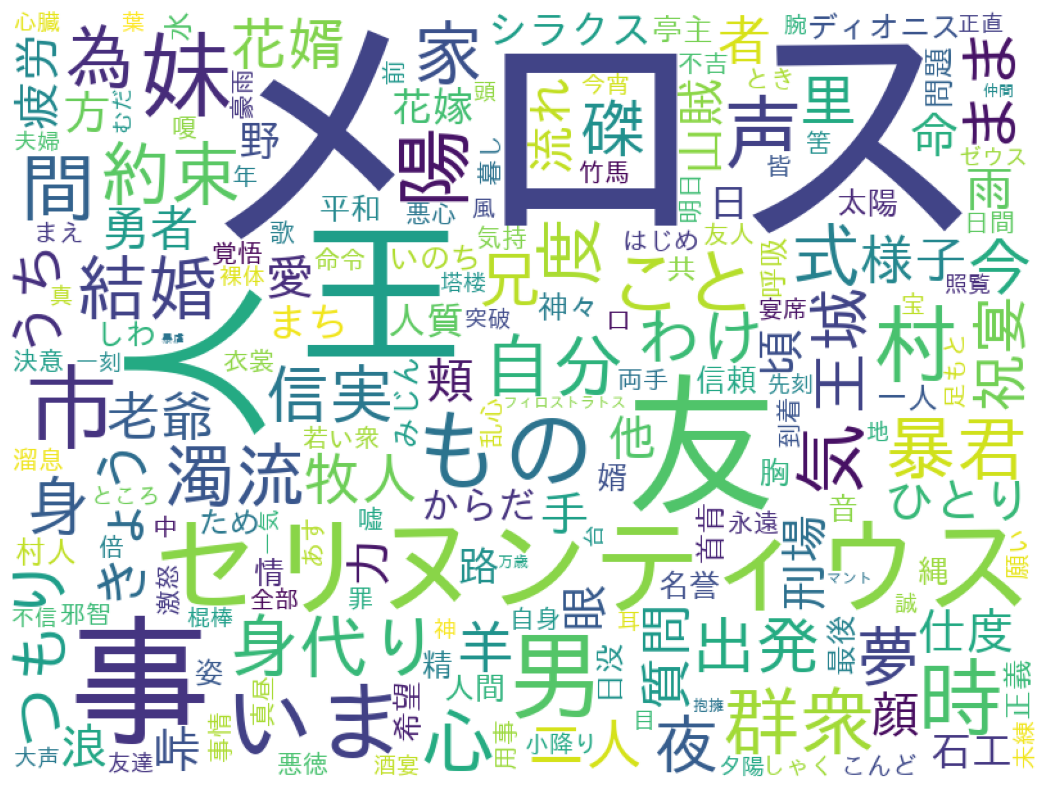

In [9]:
#wordcloud取込用に辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
width=800,height=600).fit_words(dic_result)

#生成した画像の表示
import matplotlib.pyplot as plt 
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()